# Titanic: Machine Learning from Disaster - *Predict Survival on the Titanic*


Gaoxiang Chen 	gac69@pitt.edu
Haodi Sun 	has175@pitt.edu
Dingming Feng 	dif24@pitt.edu
Yixiao Li 	yil210@pitt.edu
Linlu Liu 	lil131@pitt.edu

In [2]:
from IPython.display import Image
Image(url= 'images/timg.jpg')

## 1. Data explore

In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

|Variable|Meaning|Note|
|:---|:---|:---|
|**Survived**|0 = No, 1 = Yes|| 
|**Pclass**|Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd|1st = Upper 2nd = Middle 3rd = Lower|
|**Sex**|Sex||
|**Age**|-|Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5|
|**SibSp**|siblings / spouses aboard the Titanic|Sibling = brother, sister, stepbrother, stepsister, Spouse = husband, wife (mistresses and fiancés were ignored)|
|**parch**|parents / children aboard the Titanic|Parent = mother, father, Child = daughter, son, stepdaughter, stepson, Some children travelled only with a nanny, therefore parch=0 for them|
|**Ticket**|Ticket number||
|**Fare**|Passenger fare||
|**Cabin**|Cabin number	||
|**embarked**|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.shape

(891, 12)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
test.shape

(418, 11)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### import python lib for visualization

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [15]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

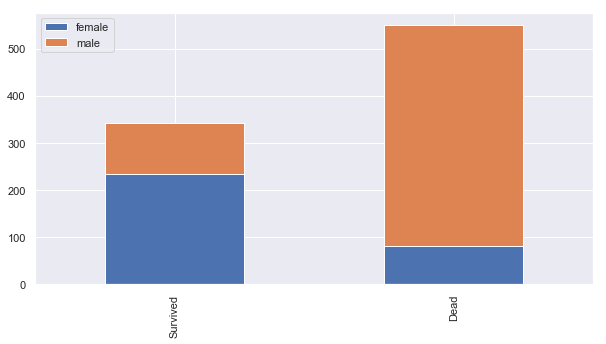

In [18]:
bar_chart('Sex')

Percentage of females who survived:74.20
Percentage of males who survived:18.89


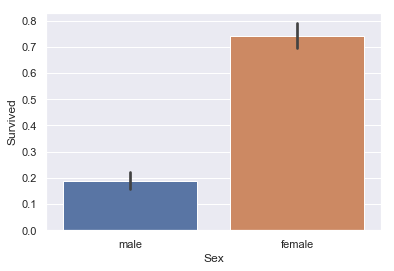

In [72]:
sns.barplot(x="Sex", y="Survived", data=train)
print("Percentage of females who survived:%.2f" % (train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100))
print("Percentage of males who survived:%.2f" % (train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100))

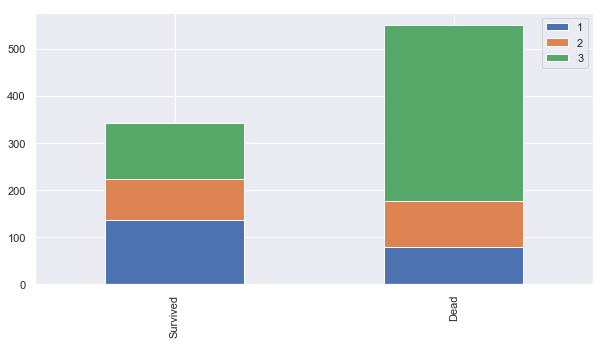

In [40]:
bar_chart('Pclass')

Percentage of Pclass = 1 who survived:62.96
Percentage of Pclass = 2 who survived:47.28
Percentage of Pclass = 3 who survived:24.24


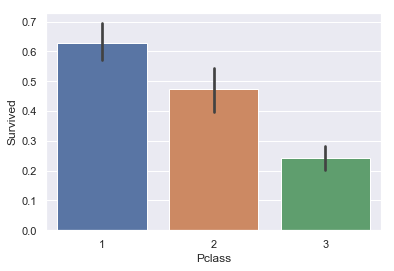

In [52]:
sns.barplot(x="Pclass", y="Survived", data=train)
print("Percentage of Pclass = 1 who survived:%.2f" % (train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100))
print("Percentage of Pclass = 2 who survived:%.2f" % (train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100))
print("Percentage of Pclass = 3 who survived:%.2f" % (train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100))


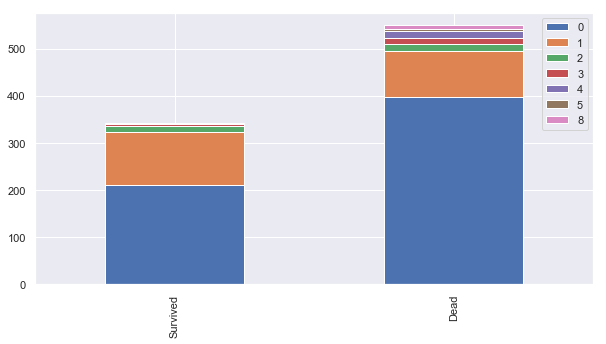

In [41]:
bar_chart('SibSp')

Percentage of SibSp Number who survived


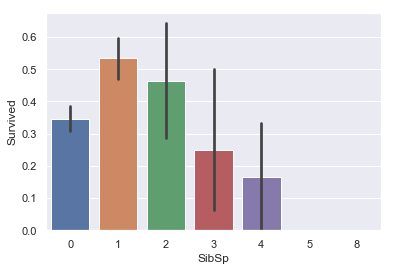

In [75]:
sns.barplot(x="SibSp", y="Survived", data=train)
print("Percentage of SibSp Number who survived")


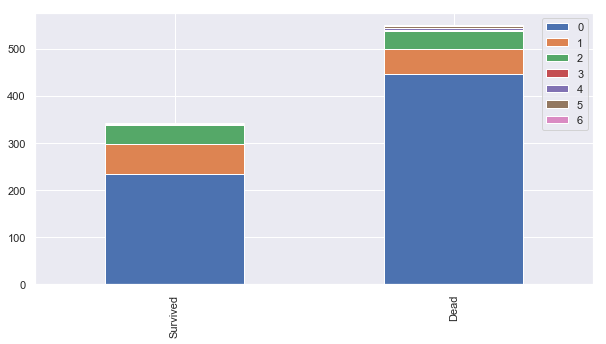

In [76]:
bar_chart('Parch')

Percentage of Parch Number who survived


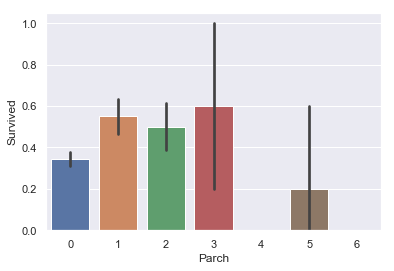

In [77]:
sns.barplot(x="Parch", y="Survived", data=train)
print("Percentage of Parch Number who survived")

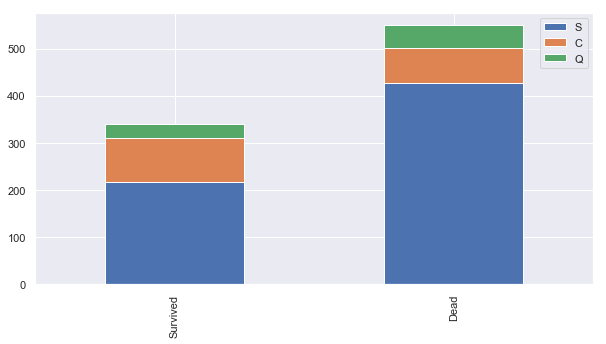

In [112]:
bar_chart('Embarked')

Percentage of Different Embarked who survived


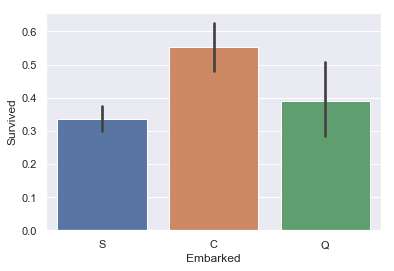

In [113]:
sns.barplot(x="Embarked", y="Survived", data=train)
print("Percentage of Different Embarked who survived")

## 2. Data process

In [114]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN


In order to handle the same thing only once, we will set a dataset combine train_data and test_data

In [115]:
train_test_data = [train, test]

### 2.1 Name

In [116]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [117]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64

In [118]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

|Variable|Chinese Meaning(help us understand)|
|:---|:---|
Mr.= mister | 先生
Mrs.= mistress | 太太/夫人
Miss | 复数为misses，对未婚妇女用,
Ms. or Mz | 美国近来用来称呼婚姻状态不明的妇女
Madame or Mme. | 复数是mesdames(简写是Mme)
Mlle|小姐
Lady|女士，指成年女子，有些人尤其是长者认为这样说比较礼貌
Dona|是西班牙语对女子的称谓，相当于英语的 Lady
Don，n.| <西>（置于男士名字前的尊称）先生，堂
Master|佣人对未成年男少主人的称呼,相当于汉语的"少爷"。
jonkheer|贵族
St.= saint|圣人
Rev.= reverend|用于基督教的牧师，如the Rev. Mr.Smith
Dr.= doctor|医生/博士
Colonel|上校
major|意思有少校人意思
countless|女伯爵

#### Title map
First we will divide it into 3 part, man, woman and kids, people with high society position
Consider the priority: Women and kids are always considered to be first priority, then is men.

"Mr": 0

"Mme","Mlle","Ms","Lady","Mrs","Miss","Master","Dona": 1 

"Don","Sir","Capt","Countess","Major","Col","Rev","Dr","Jonkheer": 2

In [119]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 1,"Mlle": 1, "Master": 1, "Ms": 1,"Lady": 1, 
                 "Mme": 1, "Dona": 1, "Dr": 2, "Rev": 2, "Col": 2, "Major": 2,"Countess": 2,
                 "Jonkheer": 2, "Don": 2, "Capt": 2, "Sir": 2 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [120]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


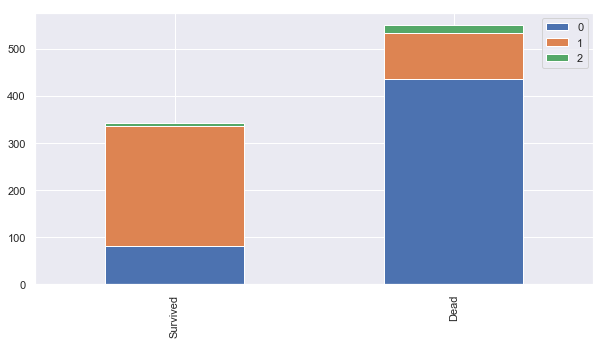

In [121]:
bar_chart('Title')

Percentage of Title = 0 who survived:15.67
Percentage of Title = 1 who survived:72.16
Percentage of Title = 2 who survived:31.82


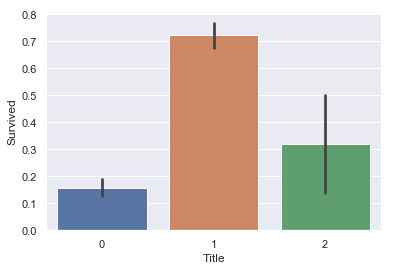

In [122]:
sns.barplot(x="Title", y="Survived", data=train)
print("Percentage of Title = 0 who survived:%.2f" % (train["Survived"][train["Title"] == 0].value_counts(normalize = True)[1]*100))
print("Percentage of Title = 1 who survived:%.2f" % (train["Survived"][train["Title"] == 1].value_counts(normalize = True)[1]*100))
print("Percentage of Title = 2 who survived:%.2f" % (train["Survived"][train["Title"] == 2].value_counts(normalize = True)[1]*100))
